# Nepal Temperature - Exploratory Data Analysis

Year: 2038 - 2067 (Actual Temeperature Data) <br>
Year: 2068 - 2110 (Predicted Temperature Data)

## Importing Required Libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use("dark_background")

In [14]:
from scripts.utils import convert_to_long_format

## Loading the Data

In [15]:
file_path = "data/district_avg_annual_temp_nepal.xlsx"

# Historical Data (From 2038 - 2080 BS)
df_4h = pd.read_excel(file_path, sheet_name="T_RCP4.5_HD")      # 4.5 W/m²
df_8h = pd.read_excel(file_path, sheet_name="T_RCP8.5_HD")      # 8.5 W/m²

# Projected Data (From 2081 - 2110 BS)
df_4p = pd.read_excel(file_path, sheet_name="T_RCP4.5_PD")      # 4.5 W/m²
df_8p = pd.read_excel(file_path, sheet_name="T_RCP8.5_PD")      # 8.5 W/m²

## Data Preprocessing

#### Converting wide format to long format

In [16]:
df_4h = convert_to_long_format(df_4h)
df_8h = convert_to_long_format(df_8h)

df_4p = convert_to_long_format(df_4p)
df_8p = convert_to_long_format(df_8p)

#### Checking for null/missing values

In [17]:
print(df_4h.isna().sum())
print(df_8h.isna().sum())
print(df_4p.isna().sum())
print(df_8p.isna().sum())

District Name    0
Year             0
Temperature      0
dtype: int64
District Name    0
Year             0
Temperature      0
dtype: int64
District Name    0
Year             0
Temperature      0
dtype: int64
District Name    0
Year             0
Temperature      0
dtype: int64


#### Adding `Scenario` and `DataType` column into the Dataframes

In [18]:
# Scenario for each dataframe:
df_4h["Scenario"] = "RCP4.5"
df_4p["Scenario"] = "RCP4.5"
df_8h["Scenario"] = "RCP8.5"
df_8p["Scenario"] = "RCP8.5"

# DataType for each dataframe:
df_4h["DataType"] = "Historical"
df_4p["DataType"] = "Projected"
df_8h["DataType"] = "Historical"
df_8p["DataType"] = "Projected"

##### Combining to create the full dataframe : df_all

In [19]:
# Creating the dataframe: df_all
df_all = pd.concat([df_4h, df_4p, df_8h, df_8p], ignore_index=True)

# adding decade column into df_all
df_all['Decade'] = (df_all["Year"] // 10) * 10

df_all

,District Name,Year,Temperature,Scenario,DataType,Decade
0,ACHHAM,2038,14.85,RCP4.5,Historical,2030
1,ARGHAKHANCHI,2038,19.45,RCP4.5,Historical,2030
2,BAGLUNG,2038,11.95,RCP4.5,Historical,2030
3,BAITADI,2038,14.35,RCP4.5,Historical,2030
4,BAJHANG,2038,2.35,RCP4.5,Historical,2030
...,...,...,...,...,...,...
11237,SYANGJA,2110,21.40,RCP8.5,Projected,2110
11238,TANAHU,2110,23.40,RCP8.5,Projected,2110
11239,TAPLEJUNG,2110,4.30,RCP8.5,Projected,2110
11240,TERHATHUM,2110,17.20,RCP8.5,Projected,2110


## Data Analysis

#### Importing Functions for Analysis

In [20]:
from scripts.utils import temp_avg_per_district, calculate_delta, avg_delta_per_district
from scripts.figures import plot_top_warming_districts, plot_temp_trends, plot_district_temp_trends

### 1. Top 10 Warming Districts of Nepal by Temperature Increase

In [21]:
hist_avg = temp_avg_per_district(df_all, "Historical", no_of_decimal=2)
proj_avg = temp_avg_per_district(df_all, "Projected", no_of_decimal=2)

temp_diff = calculate_delta(hist_avg, proj_avg)
district_deltas = avg_delta_per_district(temp_diff)

top_10_temp_increase = district_deltas.sort_values("Delta", ascending=False).head(10).reset_index(drop=True)

#### BoxPlot

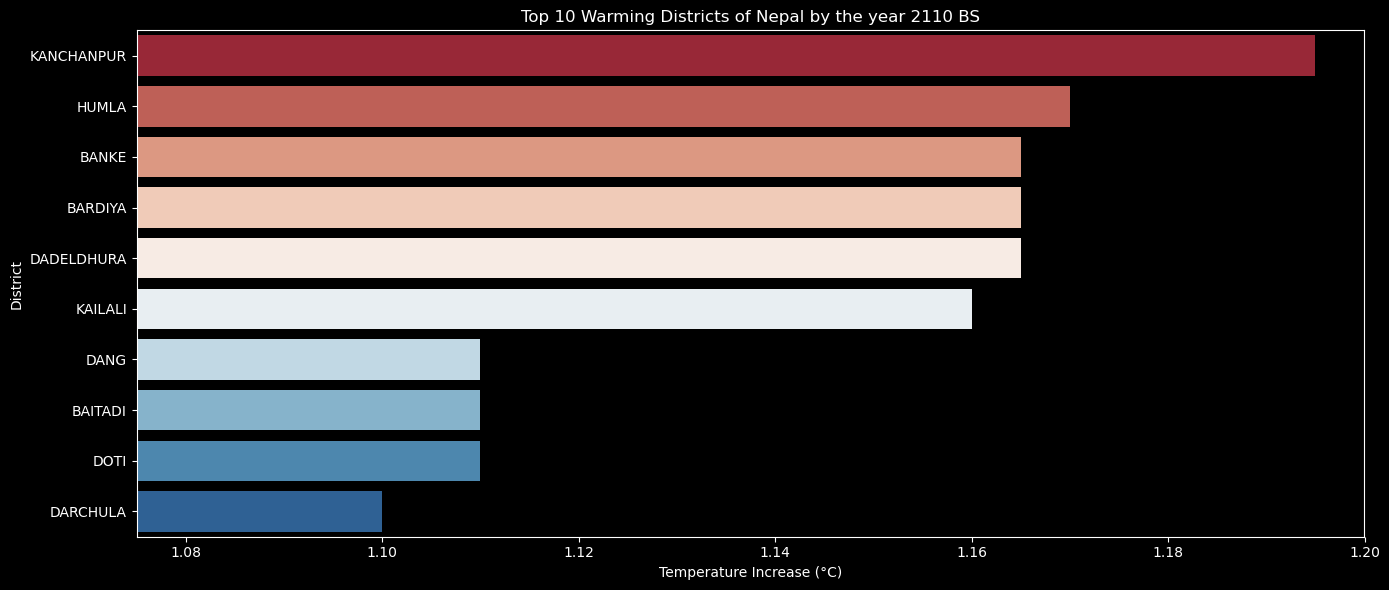

In [22]:
fig, ax = plot_top_warming_districts(top_10_temp_increase, xlim=(1.075, 1.2))
ax.set_title("Top 10 Warming Districts of Nepal by the year 2110 BS")
ax.set_xlabel("Temperature Increase (°C)")
ax.set_ylabel("District")
fig.tight_layout()
plt.show()

### 2. National Average Temperature Over Time

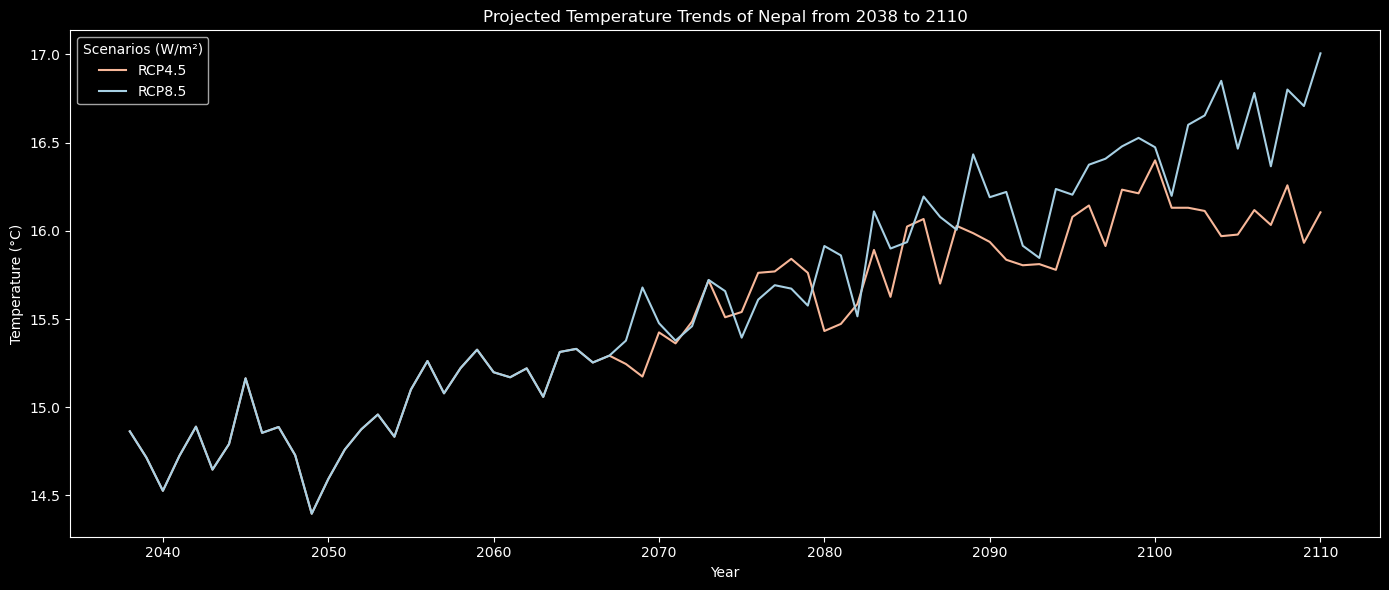

In [23]:
fig, ax = plot_temp_trends([df_4h, df_4p], [df_8h, df_8p])
ax.set_title("Projected Temperature Trends of Nepal from 2038 to 2110")
ax.set_xlabel("Year")
ax.set_ylabel("Temperature (°C)")
ax.legend(title="Scenarios (W/m²)")
plt.tight_layout()
plt.show()

### 3. District-wise Line Plot (Few Sample Districts)

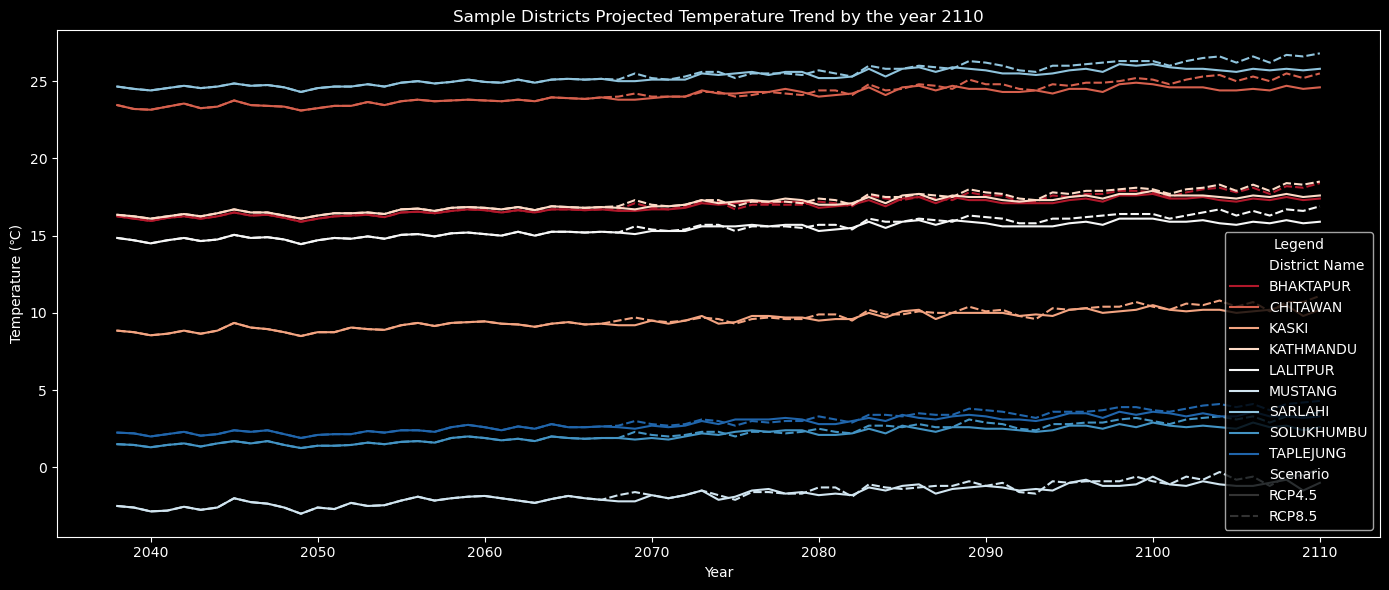

In [24]:
sample_district_list = ["KATHMANDU", "KASKI", "CHITAWAN", "MUSTANG", "SARLAHI", "BHAKTAPUR", "LALITPUR", "TAPLEJUNG", "SOLUKHUMBU"]

fig, ax = plot_district_temp_trends(df_all, sample_district_list)
ax.set_title("Sample Districts Projected Temperature Trend by the year 2110")
ax.set_xlabel("Year")
ax.set_ylabel("Temperature (℃)")
ax.legend(title="Legend")
plt.tight_layout()
plt.show()

# 📊 Temperature Trends in Nepal (2038–2110)

### 🔸 1. Warming Across All Scenarios
Nepal shows a clear rise in average temperature through 2110:

- **RCP4.5**: Steady increase  
- **RCP8.5**: Sharper rise, especially after 2080

📌 By 2110, **RCP8.5 is ~1°C hotter** than RCP4.5 — underlining the need for emission control.

---

### 🔸 2. Top 10 Warming Districts
Key districts include **Kanchanpur, Humla, Banke, Bardiya**, and **Dadeldhura**.

- Warming ranges from **~1.10°C to 1.19°C**
- Mostly mid- to far-western areas (Terai + hill zones)

📌 **Kanchanpur** leads, hinting at high vulnerability.

---

### 🔸 3. District-Level Patterns
All sampled districts show consistent warming:

- **Kathmandu Valley**: High stable temps  
- **Mountain zones (e.g., Mustang)**: Low start, steep rise  
- Scenario gap **widens after 2080**, especially in Terai/mid-hill areas

---

## Conclusion
Nepal’s warming is **universal**, with **RCP8.5 showing harsher impacts**.

- Western and Terai regions are most affected, threatening **agriculture** and **health**  
📌 **Action before 2067** is critical to avoid the steepest warming path.